In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




In [ ]:
# Step 2: Load the dataset
dataset_url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(dataset_url)


In [3]:
# Step 3: Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)



In [5]:
# Step 4: Split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size, :]
test_data = df.iloc[train_size:, :]


In [6]:
# Step 5: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data['Close'].values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data['Close'].values.reshape(-1, 1))



In [7]:
# Step 6: Create a stacked LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))



In [8]:
# Step 7: Train the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(scaled_train_data, scaled_train_data, epochs=50, batch_size=1)



Epoch 1/50
1628/1628 [==============================] - 5s 2ms/step - loss: 0.0078
Epoch 2/50
1628/1628 [==============================] - 2s 2ms/step - loss: 4.2057e-05
Epoch 3/50
1628/1628 [==============================] - 3s 2ms/step - loss: 1.8876e-06
Epoch 4/50
1628/1628 [==============================] - 3s 2ms/step - loss: 7.0759e-06
Epoch 5/50
1628/1628 [==============================] - 3s 2ms/step - loss: 1.7721e-05
Epoch 6/50
1628/1628 [==============================] - 2s 2ms/step - loss: 1.8992e-05
Epoch 7/50
1628/1628 [==============================] - 3s 2ms/step - loss: 1.0767e-05
Epoch 8/50
1628/1628 [==============================] - 3s 2ms/step - loss: 1.3158e-05
Epoch 9/50
1628/1628 [==============================] - 5s 3ms/step - loss: 1.5410e-05
Epoch 10/50
1628/1628 [==============================] - 3s 2ms/step - loss: 1.3185e-05
Epoch 11/50
1628/1628 [==============================] - 3s 2ms/step - loss: 1.6810e-05
Epoch 12/50
1628/1628 [======================

In [11]:
# Step 8: Evaluate the model's performance
train_predictions = model.predict(scaled_train_data)
test_predictions = model.predict(scaled_test_data)
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


13/13 [==============================] - 0s 1ms/step


In [9]:

# Step 9: Make predictions on future stock prices or forecast the stock market
future_data = df.iloc[train_size-1:, :]
scaled_future_data = scaler.transform(future_data['Close'].values.reshape(-1, 1))
future_prediction = model.predict(scaled_future_data)
future_prediction = scaler.inverse_transform(future_prediction)



13/13 [==============================] - 0s 913us/step


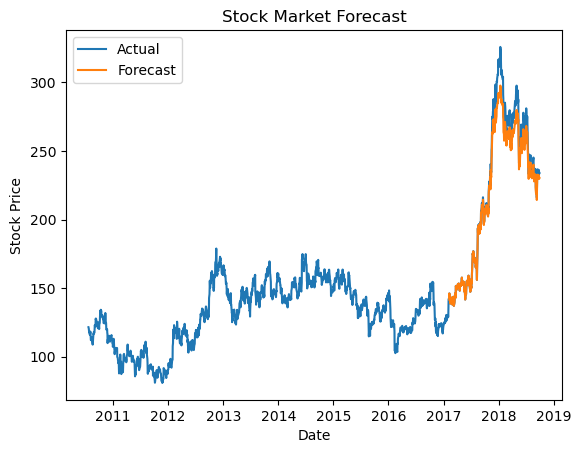

In [10]:
# Step 10: Visualize the results
plt.plot(df['Date'], df['Close'], label='Actual')
plt.plot(future_data['Date'], future_prediction, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Market Forecast')
plt.legend()
plt.show()